# Checking Results

In [55]:
import pandas as pd
import pygmo as pg
import matplotlib.pyplot as plt
import seaborn as sns

In [86]:
configs = pd.read_csv('./results_no_cv_HO_02_12')

In [87]:
configs.head()

,fold,rmse_train,mae_train,r2_train,std_train,rmse_test,mae_test,r2_test,std_test,net_cfg,uncertainty_train,uncertainty_test
0,NaN,63.968741,46.792997,-6.755691,NaN,58.799207,44.783553,-10.312482,NaN,"{""num_rec"": 2, ""max_time"": 31, ""neuron_0"": 68,...",52.481415,25.386108
1,NaN,58.783163,47.870046,-0.338169,NaN,60.368987,49.798355,-1.123838,NaN,"{""num_rec"": 2, ""max_time"": 34, ""neuron_0"": 82,...",19.065456,18.883347
2,NaN,43.835908,33.517477,-0.019865,NaN,42.113982,34.429745,-0.338607,NaN,"{""num_rec"": 2, ""max_time"": 29, ""neuron_0"": 70,...",12.584046,13.012033
3,NaN,41.150700,31.337908,0.413130,NaN,42.275093,34.050320,0.197951,NaN,"{""num_rec"": 2, ""max_time"": 38, ""neuron_0"": 90,...",20.173216,21.178406
4,NaN,26.469795,24.683478,-2.114158,NaN,24.985219,23.668761,-4.307410,NaN,"{""num_rec"": 2, ""max_time"": 34, ""neuron_0"": 93,...",11.045533,10.390176


In [88]:
configs.columns

Index(['fold', ' rmse_train', ' mae_train', ' r2_train', ' std_train',
       ' rmse_test', ' mae_test', ' r2_test', ' std_test', ' net_cfg',
       ' uncertainty_train', ' uncertainty_test'],
      dtype='object')

In [89]:
configs.columns = configs.columns.str.replace(' ', '')

In [90]:
configs.drop(['std_train', 'std_test'], axis=1, inplace=True)

In [91]:
configs.head()

,fold,rmse_train,mae_train,r2_train,rmse_test,mae_test,r2_test,net_cfg,uncertainty_train,uncertainty_test
0,NaN,63.968741,46.792997,-6.755691,58.799207,44.783553,-10.312482,"{""num_rec"": 2, ""max_time"": 31, ""neuron_0"": 68,...",52.481415,25.386108
1,NaN,58.783163,47.870046,-0.338169,60.368987,49.798355,-1.123838,"{""num_rec"": 2, ""max_time"": 34, ""neuron_0"": 82,...",19.065456,18.883347
2,NaN,43.835908,33.517477,-0.019865,42.113982,34.429745,-0.338607,"{""num_rec"": 2, ""max_time"": 29, ""neuron_0"": 70,...",12.584046,13.012033
3,NaN,41.150700,31.337908,0.413130,42.275093,34.050320,0.197951,"{""num_rec"": 2, ""max_time"": 38, ""neuron_0"": 90,...",20.173216,21.178406
4,NaN,26.469795,24.683478,-2.114158,24.985219,23.668761,-4.307410,"{""num_rec"": 2, ""max_time"": 34, ""neuron_0"": 93,...",11.045533,10.390176


In [92]:
pareto_index = pg.non_dominated_front_2d(configs[['rmse_test', 'uncertainty_test']])

In [93]:
pareto_configs = configs.iloc[pareto_index]

In [94]:
pareto_configs

,fold,rmse_train,mae_train,r2_train,rmse_test,mae_test,r2_test,net_cfg,uncertainty_train,uncertainty_test
8,NaN,9.313440,5.343639,0.919224,8.273354,4.456959,0.894438,"{""num_rec"": 2, ""max_time"": 22, ""neuron_0"": 78,...",7.419840,7.151474
101,NaN,32.130170,26.287811,0.024171,29.451902,25.909248,-0.198372,"{""num_rec"": 3, ""max_time"": 27, ""neuron_0"": 71,...",0.118241,0.118805
81,NaN,41.126135,37.251686,-9.195893,39.444394,36.687209,-10.995280,"{""num_rec"": 3, ""max_time"": 27, ""neuron_0"": 75,...",0.096876,0.097757
39,NaN,122.578357,73.521855,-0.191590,61.954630,50.443789,-4.285146,"{""num_rec"": 3, ""max_time"": 27, ""neuron_0"": 85,...",0.091322,0.093826
97,NaN,61.293982,56.295943,-42.843945,64.298342,60.594371,-69.340714,"{""num_rec"": 3, ""max_time"": 31, ""neuron_0"": 80,...",0.092684,0.091830
66,NaN,61.456983,57.343132,-31358.709533,64.383069,61.167142,-325500.509086,"{""num_rec"": 3, ""max_time"": 29, ""neuron_0"": 71,...",0.056014,0.046417
106,NaN,61.845141,58.022138,-21482.657261,64.817620,61.804616,-363282.199054,"{""num_rec"": 3, ""max_time"": 30, ""neuron_0"": 91,...",0.040244,0.032897


Text(0, 0.5, 'std_test')

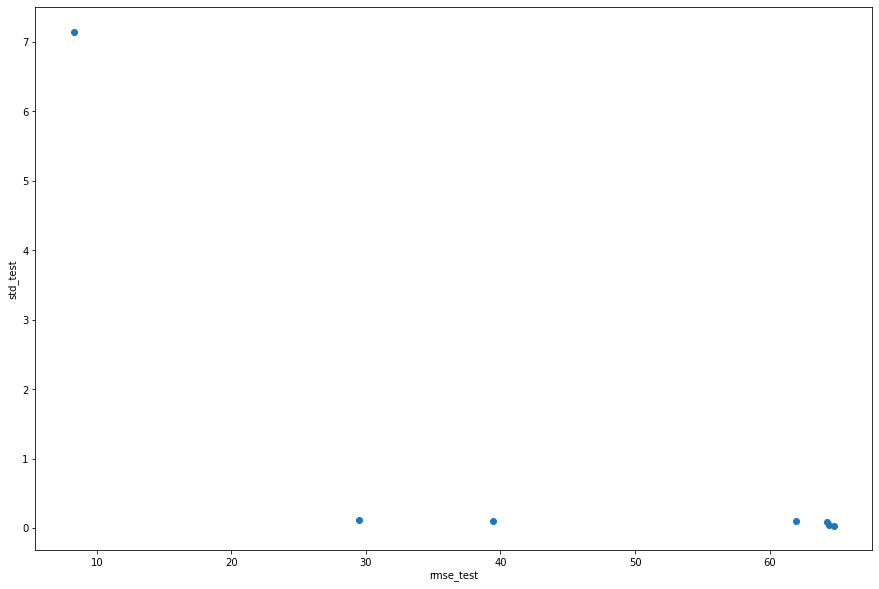

In [96]:
x = pareto_configs['rmse_test'].values
y = pareto_configs['uncertainty_test'].values
plt.figure(figsize=(15,10))
plt.scatter(x, y)
plt.xlabel('rmse_test')
plt.ylabel('std_test')

# for i, txt in enumerate(pareto_configs.index):
#     plt.annotate(txt, (x[i], y[i]))

In [99]:
pareto_configs.loc[8].net_cfg

'{"num_rec": 2, "max_time": 22, "neuron_0": 78, "neuron_1": 71, "neuron_2": 87, "neuron_3": 96, "activation_0": "sigmoid", "activation_1": "tanh", "activation_2": "sigmoid", "activation_3": "sigmoid", "dropout_0": 0.18803475666664804, "dropout_1": 0.6040324537064773, "dropout_2": 0.3227885166987346, "dropout_3": 0.2287547425262742, "recurrent_dropout_0": 0.4464387484895227, "recurrent_dropout_1": 0.6236043939191586, "recurrent_dropout_2": 0.3135094606418331, "recurrent_dropout_3": 0.842983970188618, "final_activation_0": "softplus", "final_activation_1": "softplus", "percentage": 67, "rul": 127, "rul_style": "nonlinear", "lr": "1e-3", "batch": "128"}'

In [ ]:
sns.set_theme()

plt.figure(figsize=(15,10))
sns.scatterplot(data=pareto_configs, x='rmse_test', y='std_test')
plt.title('Pareto Front')

In [ ]:
pareto_configs.loc[186].net_cfg

# Checking if changes work

In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"]="-1"

import tensorflow as tf
from preprocessing import build_data
import pandas as pd
import math
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


from activations import Activate
from losses import CustomLoss
from preprocessing import build_data


import main



In [2]:
def weibull_mean(alpha, beta):
    return alpha * math.gamma(1 + 1/beta)

In [1]:
model, train_results_df, test_results_df, test_x_orig, test_y_orig, scaler, train_x, test_x = main.main()
# model = main.main()

NameError: name 'main' is not defined

In [2]:
import numpy as np

In [3]:
if np.isfinite(np.array([1]).mean()) and np.isfinite(np.array([2]).mean()):
    print('ha')

ha


In [4]:
model

In [10]:
# model.save('./toy_model')

In [9]:
# new_model = tf.keras.models.load_model('./toy_model', custom_objects={"CustomLoss": CustomLoss, "Activate": Activate})

# Building model incrementally

In [100]:
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]="-1"  #"1,2,3,4,5"  # uncomment in case running ONLY on CPU is required

import tensorflow as tf
tf.random.set_seed(42)
from tensorflow.keras import backend as k
from tensorflow.keras import callbacks
from tensorflow.keras.callbacks import History
from tensorflow import keras
from tensorflow.keras.optimizers import Adam

from activations import Activate
from losses import CustomLoss
from preprocessing import build_data

import numpy as np
import pandas as pd
import math
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import pipeline
from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler

In [168]:
net_cfg = {
     "max_time": 100,
     "lr": "0.001",
     "num_rec": 3,
     "neuron_0": 100,
     "activation_0": "tanh",
     "dropout_0": 0.25,
     "recurrent_dropout_0": 0.25,
     "neuron_1": 50,
     "activation_1": "tanh",
     "dropout_1": 0.25,
     "recurrent_dropout_1": 0.25,
     "neuron_2": 20,
     "activation_2": "tanh",
     "dropout_2": 0.25,
     "recurrent_dropout_2": 0.25,
     "final_activation_0": "exp",
     "final_activation_1": "softplus",
     "percentage": 50,
     "rul": 115,
     "rul_style": "nonlinear",
     "batch": "128",
}

In [176]:
cfg = {
        "cv": 10,
        "shuffle": True,
        "random_state": 21,
        "mask_value": -99,
        "reps": 30,
        "epochs": 10,
        "batches": 64,
        "in_reps": 10,
    }

In [177]:
def weibull_mean(alpha, beta):
    return alpha * math.gamma(1 + 1/beta)

In [178]:
def weibull_pdf(alpha, beta, t):
    return (beta/alpha) * (t/alpha)**(beta-1)*np.exp(- (t/alpha)**beta)

In [179]:
def weibull_median(alpha, beta):
    return alpha*(-np.log(.5))**(1/beta)

In [180]:
def weibull_mode(alpha, beta):
    # assert np.all(beta > 1)
    return alpha * ((beta-1)/beta)**(1/beta)

In [181]:
def weibull_variance(alpha, beta):
    var = alpha**2*(math.gamma(1+2/beta)-math.gamma(1+1/beta)**2)
    return var

In [182]:
def network(train_X, train_y, test_x, test_y, net_cfg, cfg):

    strategy = tf.distribute.MirroredStrategy()
    print("Number of devices: {}".format(strategy.num_replicas_in_sync))
    k.set_epsilon(1e-10)
    history = History()
    nan_terminator = callbacks.TerminateOnNaN()
    reduce_lr = callbacks.ReduceLROnPlateau(monitor='loss')
    early_stopping = callbacks.EarlyStopping(monitor='loss', patience=5)
    # checkpoint_filepath = './saved_models/cp-{epoch:04d}.ckpt'
    # checkpoint = callbacks.ModelCheckpoint(filepath=checkpoint_filepath, monitor='loss', verbose=1)
    # logdir="logs/test1" #+ datetime.now().strftime("%Y%m%d-%H%M%S")
    # tensorboard = callbacks.TensorBoard(log_dir=logdir)

    window = train_X.shape[1]
    n_features = train_X.shape[2]

    # with strategy.scope():  # Create a MirroredStrategy.

    inputs = keras.Input(shape=(window, n_features))
    masking_layer = keras.layers.Masking(mask_value=cfg['mask_value'])(inputs)

    # recurrent layers
    if net_cfg['num_rec'] > 1:
        for i in np.arange(net_cfg['num_rec']-1):
            masking_layer = keras.layers.GRU(net_cfg['neuron_'+str(i)], activation=net_cfg['activation_'+str(i)],
                                    dropout=net_cfg['dropout_'+str(i)],
                                    recurrent_dropout=net_cfg['recurrent_dropout_'+str(i)],
                                    return_sequences=True)(masking_layer)
    last = i + 1
    gru_last = keras.layers.GRU(net_cfg['neuron_'+str(last)], activation=net_cfg['activation_'+str(last)],
                                dropout=net_cfg['dropout_'+str(last)],
                                recurrent_dropout=net_cfg['recurrent_dropout_'+str(last)],
                                return_sequences=False)(masking_layer)

    dense_1 = keras.layers.Dense(2)(gru_last)
    custom_activation = Activate(net_cfg=net_cfg)
    outputs = keras.layers.Activation(custom_activation)(dense_1)

    model = keras.Model(inputs=inputs, outputs=outputs, name="weibull_params")

    # rmse = tf.keras.metrics.RootMeanSquaredError()
    model.compile(loss=CustomLoss(kind='continuous', reduce_loss=True), optimizer=Adam(lr=eval(net_cfg['lr']),
                                                                                    clipvalue=0.5))
    model.summary()  # uncomment for debugging

    batch_size=eval(net_cfg['batch'])
    model.fit(train_X, train_y,
              epochs=cfg['epochs'],
              batch_size=batch_size,
              validation_data=(test_x, test_y),
              verbose=1,
              callbacks=[nan_terminator, history, reduce_lr, early_stopping],#, checkpoint, tensorboard],  # , tensorboard
              workers=32)

    return model, history



In [183]:
def load_data():

    np.random.seed(42)

    id_col = 'unit_number'
    time_col = 'time'
    feature_cols = ['op_setting_1', 'op_setting_2', 'op_setting_3'] + ['sensor_measurement_{}'.format(x) for x in
                                                                       range(1, 22)]
    column_names = [id_col, time_col] + feature_cols

    train_x_orig = pd.read_csv('./DataSets/CMAPSS/train_FD001.csv', header=None, sep='\s+', decimal=".")
    train_x_orig.columns = column_names

    test_x_orig = pd.read_csv('./DataSets/CMAPSS/test_FD001.csv', header=None, sep='\s+', decimal=".")
    test_x_orig.columns = column_names

    test_y_orig = pd.read_csv('./DataSets/CMAPSS/RUL_FD001.csv', header=None, names=['T'])

    # Make engine numbers and days zero-indexed
    train_x_orig.iloc[:, 0:2] -= 1
    test_x_orig.iloc[:, 0:2] -= 1

    train_idx = np.random.choice(range(train_x_orig.unit_number.unique().max()+1), replace=False, size=80)  # selecting 80 units for training
    train_idx.sort()

    vld_idx = np.array([x for x in range(train_x_orig.unit_number.unique().max()+1) if x not in train_idx])  # remaining are validation indices

    train_or = train_x_orig[train_x_orig.unit_number.isin(train_idx)]  # training data
    train_or.reset_index(drop=True, inplace=True)
    vld = train_x_orig[train_x_orig.unit_number.isin(vld_idx)]  # validation data
    vld.reset_index(drop=True, inplace=True)


    # Truncating the validation data randomly 5 times each
    vld_trunc = []
    test_y = []
    max_cycle = []
    test_index = []  # for debugging purposes
    temp_or_test_cycles = []
    counter = -1

    for i in set(vld.unit_number.unique()):
        # print(f'unit number is {i}')
        for j in range(1,6):  # 5 truncations per instance
            counter += 1
            np.random.seed(i*j)
            temp_df = vld[vld.unit_number == i]
            temp_df.reset_index(drop=True, inplace=True)  # important
            length = temp_df.shape[0]
            # print(length)
            temp_or_test_cycles.append(length)
            level = np.random.choice(np.arange(5, 96), 1)[0]
            r = np.int(length * (1 - level / 100))
            # test_index.append(X_test_or[X_test_or.unit_number == i].index.tolist()[
            #                     :r + 1])  # check this with train_x_orig instead of X_test_or (probably it's the same)
            temp_df = temp_df.truncate(after=r)
            # print(temp_df.shape[0])
            # print('\n')
            temp_df['unit_number'] = np.repeat(counter, temp_df.shape[0])
            vld_trunc.append(temp_df)
            max_cycle.append(length)


    # test_index = [item for sublist in test_index for item in sublist]

    vld_trunc = pd.concat(vld_trunc)
    vld_trunc.reset_index(drop=True, inplace=True)
    # print(f'max len per unit is {max_cycle}')


    # Pre-processing data
    scaler = pipeline.Pipeline(steps=[
        ('minmax', MinMaxScaler(feature_range=(-1, 1))),
        ('remove_constant', VarianceThreshold())])

    train = train_or.copy()
    train = np.concatenate([train[['unit_number', 'time']], scaler.fit_transform(train[feature_cols])], axis=1)

    train_x, train_y = build_data(units=train[:, 0], time=train[:, 1], x=train[:, 2:], max_time=net_cfg['max_time'],
                                    is_test=False, mask_value=cfg['mask_value'],
                                    original_data=None, net_cfg = net_cfg, label=net_cfg['rul_style'])

    vld = vld_trunc.copy()
    vld = np.concatenate([vld[['unit_number', 'time']], scaler.transform(vld[feature_cols])], axis=1)
    test_x, test_y = build_data(units=vld[:, 0],
        time=vld[:, 1],
        x=vld[:, 2:],
        max_time=net_cfg["max_time"],
        is_test=True,
        mask_value=cfg["mask_value"],
        original_data=np.array(max_cycle),
        net_cfg=net_cfg,
        label=net_cfg["rul_style"],
    )

    return train_x, train_y, test_x, test_y, train_or, vld_trunc

In [184]:
train_x, train_y, test_x, test_y, train, test = load_data()
print('train_x', train_x.shape, 'train_y', train_y.shape, 'test_x', test_x.shape, 'test_y', test_y.shape, 'train', train.shape, 'test', test.shape)



100%|██████████| 100/100 [00:00<00:00, 7680.75it/s]

train_x (16340, 100, 17) train_y (16340, 1) test_x (100, 100, 17) test_y (100, 1) train (16340, 26) test (10312, 26)


In [185]:
k.clear_session()
try:
    del model
except:
    pass

model, history = network(train_x, train_y, test_x, test_y, net_cfg, cfg)

INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:CPU:0',)


INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:CPU:0',)


Number of devices: 1


/home/kefalasm/rul_nn/lib/python3.8/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Model: "weibull_params"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 100, 17)]         0         
_________________________________________________________________
masking (Masking)            (None, 100, 17)           0         
_________________________________________________________________
gru (GRU)                    (None, 100, 100)          35700     
_________________________________________________________________
gru_1 (GRU)                  (None, 100, 50)           22800     
_________________________________________________________________
gru_2 (GRU)                  (None, 20)                4320      
_________________________________________________________________
dense (Dense)                (None, 2)                 42        
_________________________________________________________________
activation (Activation)      (None, 2)              

In [186]:
model.save('./toy_model')

INFO:tensorflow:Assets written to: ./toy_model/assets


INFO:tensorflow:Assets written to: ./toy_model/assets


In [124]:
# model = tf.keras.models.load_model('./toy_model', custom_objects={"CustomLoss": CustomLoss, "Activate": Activate})

In [161]:
model

In [15]:
model.get_config()['output_layers']

[['activation', 0, 0]]

In [196]:
train_predict_1 = []
train_predict_2 = []

success = True

for i in range(cfg['reps']):
    tf.random.set_seed(i)
    train_predict = model(train_x, training=True).numpy()
    train_predict_1.append(train_predict[:, 0].reshape(train_predict[:, 0].shape[0], 1))
    train_predict_2.append(train_predict[:, 1].reshape(train_predict[:, 1].shape[0], 1))

train_predict_1_mean = np.median(np.hstack(train_predict_1), axis=1)
train_predict_2_mean = np.median(np.hstack(train_predict_2), axis=1)
train_predict_1_mean = train_predict_1_mean.reshape(train_predict_1_mean.shape[0], 1)
train_predict_2_mean = train_predict_2_mean.reshape(train_predict_2_mean.shape[0], 1)
train_predict_1_std = np.std(np.hstack(train_predict_1), axis=1)
train_predict_2_std = np.std(np.hstack(train_predict_2), axis=1)
train_predict_1_std = train_predict_1_std.reshape(train_predict_1_std.shape[0], 1)
train_predict_2_std = train_predict_2_std.reshape(train_predict_2_std.shape[0], 1)

train_predict = np.hstack([train_predict_1_mean, train_predict_2_mean,
                            train_predict_1_std, train_predict_2_std])

train_predict = np.resize(train_predict, (train_x.shape[0], 4))  # changed from 2 to 4
train_result = np.concatenate((train_y, train_predict), axis=1)
train_results_df_old = pd.DataFrame(train_result, columns=['T', 'mean_alpha', 'mean_beta', 'std_alpha',
                                                        'std_beta'])  # (add 'E' for event)
train_results_df_old['unit_number'] = train['unit_number'].to_numpy()
train_results_df_old['time'] = train['time'].to_numpy()

train_results_df_old['predicted_mu'] = train_results_df_old[['mean_alpha', 'mean_beta']].apply(
    lambda row: weibull_mean(row[0], row[1]), axis=1)

In [20]:
train_predict_1 = np.array(train_predict_1)

In [21]:
train_predict_2 = np.array(train_predict_2)

In [22]:
train_predict_1.shape

(30, 16340, 1)

In [23]:
train_predict_1.resize(30, 16340)

In [24]:
train_predict_2.resize(30, 16340)

In [25]:
train_predict_1[:,1]

array([132.97829 , 123.23054 , 124.54932 , 122.32817 , 120.403915,
       130.73293 , 104.53065 , 119.13004 , 113.69697 , 153.43895 ,
       152.46115 , 122.44974 , 125.80001 , 120.75015 , 107.46349 ,
       114.002716, 125.00156 , 111.63954 , 108.24521 , 108.84976 ,
       139.0864  , 137.08862 , 118.6768  , 118.238594, 134.57979 ,
       138.68983 , 126.762245, 115.65711 , 139.75046 , 135.50706 ],
      dtype=float32)

In [40]:
train_predict_1[:,16339]

array([ 0.41705817, 12.625637  ,  0.63515407,  7.228504  ,  3.1942136 ,
        0.07566568,  2.8691864 ,  1.387541  ,  4.0971513 ,  5.763522  ,
       14.557368  , 12.584854  ,  3.7971506 ,  1.4213378 ,  6.7815943 ,
        4.707724  ,  0.19926678,  2.8029566 ,  5.4847    ,  3.3876393 ,
        0.5993108 ,  1.0875534 ,  7.0147896 ,  2.7878008 ,  3.4252214 ,
        7.5762835 ,  0.1216777 ,  0.4439667 ,  0.1773132 ,  0.9611091 ],
      dtype=float32)

In [27]:
train_predict_2[:,1]

array([14.678265, 15.838853, 15.775572, 14.408605, 16.353857, 14.302875,
       15.161706, 16.727022, 15.966782, 12.435256, 13.328977, 16.388186,
       15.86963 , 16.508802, 15.440501, 15.19744 , 16.054945, 15.993076,
       15.267684, 16.106028, 15.3978  , 15.539538, 16.215986, 16.234024,
       14.858935, 14.238721, 14.513758, 16.973845, 15.03419 , 15.020367],
      dtype=float32)

In [39]:
train_predict_2[:,16339]

array([5.8427448e-03, 4.9685388e+00, 3.4116201e-02, 2.3138850e+00,
       1.6480570e+00, 8.2829857e-04, 1.0383902e+00, 1.1439174e+00,
       2.5860670e+00, 3.9850752e+00, 4.9656487e+00, 5.6004195e+00,
       2.4956729e+00, 3.6161962e-01, 3.0081646e+00, 2.4999211e+00,
       3.5001922e-03, 1.5262645e+00, 3.6114802e+00, 1.1387600e+00,
       6.9223523e-02, 2.2952071e-01, 2.7980986e+00, 2.5398455e+00,
       1.5327101e+00, 3.9090512e+00, 6.5446319e-04, 1.4355426e-03,
       1.4663087e-03, 1.6815068e-01], dtype=float32)

In [32]:
weib_tests_old = []
for a,b in zip(train_predict_1[:, 16339], train_predict_2[:, 16339]):
    weib_tests_old.append(a * np.random.weibull(b, cfg["in_reps"]))

weib_tests_old = np.array(weib_tests_old)

In [33]:
weib_tests_old.shape

(30, 10)

In [34]:
np.isinf(weib_tests_old).sum()

6

In [35]:
weib_tests_old

array([[1.03548105e-091, 1.18890112e-011, 2.14093963e+113,
        1.32122409e+000, 2.74676193e-108, 2.25286390e-184,
        5.39889323e-212, 3.99865490e+047, 9.36530096e+046,
        5.38124627e+055],
       [1.66505781e+001, 8.35894106e+000, 1.11503345e+001,
        1.50562481e+001, 7.47121026e+000, 1.51222583e+001,
        1.36188747e+001, 1.27515154e+001, 1.02780670e+001,
        8.09552990e+000],
       [2.02412786e-023, 1.11960845e+001, 5.46507616e-009,
        3.25045649e+012, 2.20373050e-035, 1.73462270e+007,
        8.27133346e+010, 2.17671201e+015, 9.03276339e+015,
        3.75325046e+009],
       [1.17186163e+001, 2.62312949e+000, 1.37077904e+001,
        5.48382404e+000, 6.68961391e+000, 2.80010348e+000,
        4.35862926e+000, 6.17466251e+000, 5.84394461e+000,
        5.53020167e+000],
       [1.79220715e+000, 3.14322193e+000, 1.64925369e+000,
        2.98592237e+000, 1.27158312e+000, 3.24208788e+000,
        4.38814381e+000, 1.82020060e+000, 2.36998617e+000,
        3.1

In [36]:
mean_a_old = np.mean(train_predict_1[:, 16339])

In [37]:
mean_b_old = np.mean(train_predict_2[:, 16339])

In [38]:
weibull_mean(mean_a_old, mean_b_old)

3.503604979558454

In [27]:
train_results_df_old.shape

(16340, 8)

In [197]:
s = train_results_df_old[train_results_df_old.unit_number==3].iloc[::5]

In [198]:
s

,T,mean_alpha,mean_beta,std_alpha,std_beta,unit_number,time,predicted_mu
192,115.000000,167.048492,3.864671,38.779881,0.520524,3,0,151.118887
197,115.000000,113.492569,11.698293,4.837799,0.191233,3,5,108.654025
202,115.000000,113.724648,11.881313,4.963286,0.125416,3,10,108.940130
207,115.000000,115.153397,11.914815,6.167689,0.161325,3,15,110.320436
212,115.000000,114.557144,11.958870,3.427224,0.061974,3,20,109.764386
217,115.000000,114.265701,11.964808,3.701931,0.110746,3,25,109.487169
222,115.000000,115.057648,11.989979,3.859405,0.103454,3,30,110.254657
227,115.000000,114.839996,12.025646,3.801479,0.075383,3,35,110.058287
232,115.000000,113.221054,12.011677,4.182622,0.099346,3,40,108.502052
237,115.000000,113.433044,12.021233,4.515227,0.113484,3,45,108.708431


In [199]:
def plot_weibull_variance(results_df):

    plt.figure(figsize=(30,20))
    palette = sns.color_palette("RdBu_r", results_df.shape[0] + 1)
    color_dict = dict(enumerate(palette))

    for i, row in enumerate(results_df.iterrows()):
            alpha=row[1]['mean_alpha']
            beta = row[1]['mean_beta']
            color = color_dict[i]
            variance = weibull_variance(alpha, beta)

            plt.scatter(i, variance, color=color)
            plt.text(i, variance+0.5, i*5)
            plt.title('Weibull distributions variance')
            # plt.legend()


In [200]:
def plot_weibull_predictions(results_df):

    fig, axarr = plt.subplots(1, figsize=(30,20))

    t=np.arange(0,400)

    palette = sns.color_palette("RdBu_r", results_df.shape[0] + 1)
    color_dict = dict(enumerate(palette))

    for i, row in enumerate(results_df.iterrows()):
            alpha=row[1]['mean_alpha']
            beta = row[1]['mean_beta']
            T = row[1]['T']
            label = 'a={} b={}'.format(alpha, beta)

            color = color_dict[i]
            ax= axarr  #[0]
            mode = weibull_mode(alpha, beta)
            y_max = weibull_pdf(alpha, beta, mode)    

            ax.plot(t, weibull_pdf(alpha, beta, t), color=color)  # label=label
            ax.scatter(T, weibull_pdf(alpha,beta, T), color=color, s=100)
            ax.vlines(mode, ymin=0, ymax=y_max, colors=color, linestyles='--')
            ax.text(mode, y_max, i*5)

            ax.set_title('Weibull distributions')
            # ax.legend()
    
    # ax=axarr[1]
    
    # median_predictions = weibull_median(results_df['alpha'], results_df['beta'])
    # mean_predictions = results_df[['alpha', 'beta']].apply(lambda row: weibull_mean(row[0], row[1]), axis=1)
    # mode_predictions = weibull_mode(results_df['alpha'], results_df['beta'])
#     x = results_df['time']
    
#     ax.scatter(x, results_df['T'], label='survival_time', color='black')

#     ax.scatter(results_df['T'], median_predictions, label='median_prediction')
#     ax.scatter(results_df['T'], mean_predictions, label='mean_prediction')
    # ax.scatter(results_df['T'], mode_predictions, label='m_prediction')
    # ax.set_title('MAP prediction Vs. true')
    

    # ax.legend()
    
    # ax=axarr[2]
    # sns.distplot(results_df['T'] - mode_predictions, ax=ax)
    # ax.set_title('Error')

#     ax.plot(x, results_df['alpha'], label='alpha')
#     ax.legend()
    
#     ax = axarr[3]
#     ax.plot(x, results_df['beta'], label='beta')
#     ax.legend()
    
#     ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
#     fig.suptitle(title)
    plt.show()


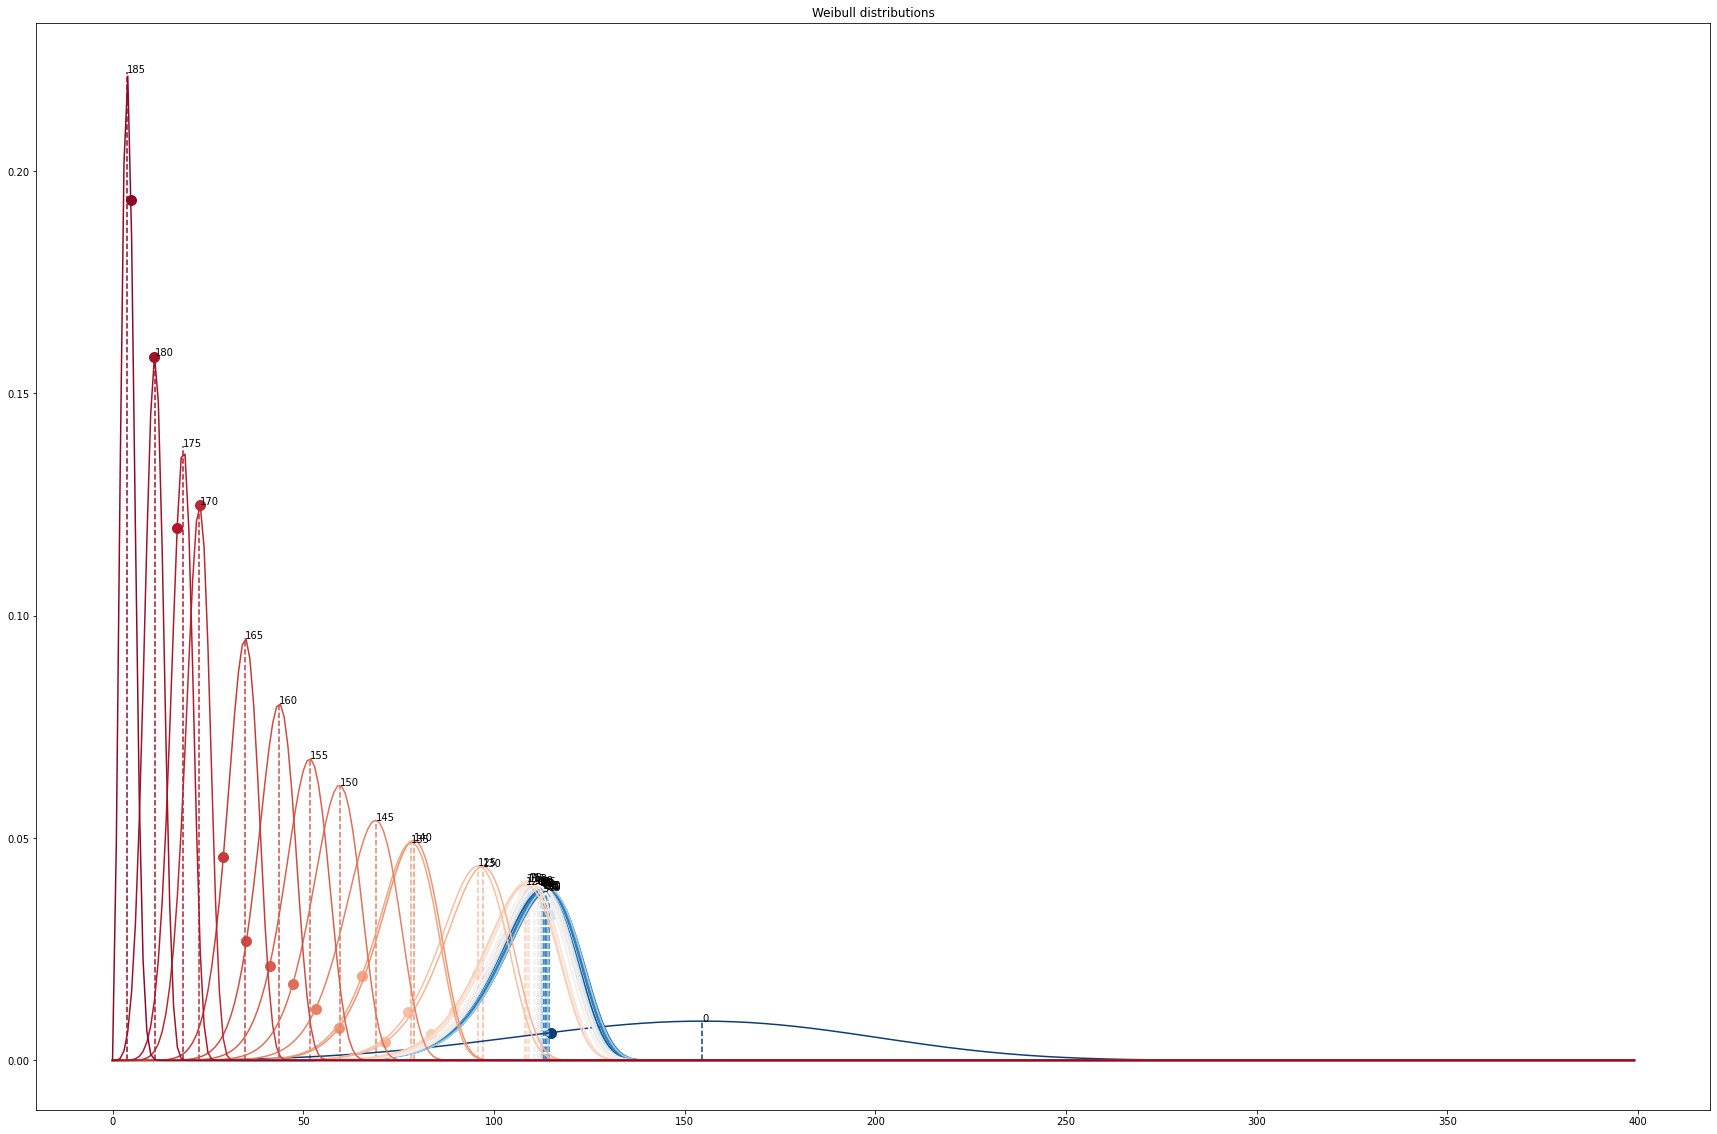

In [201]:
plot_weibull_predictions(s)

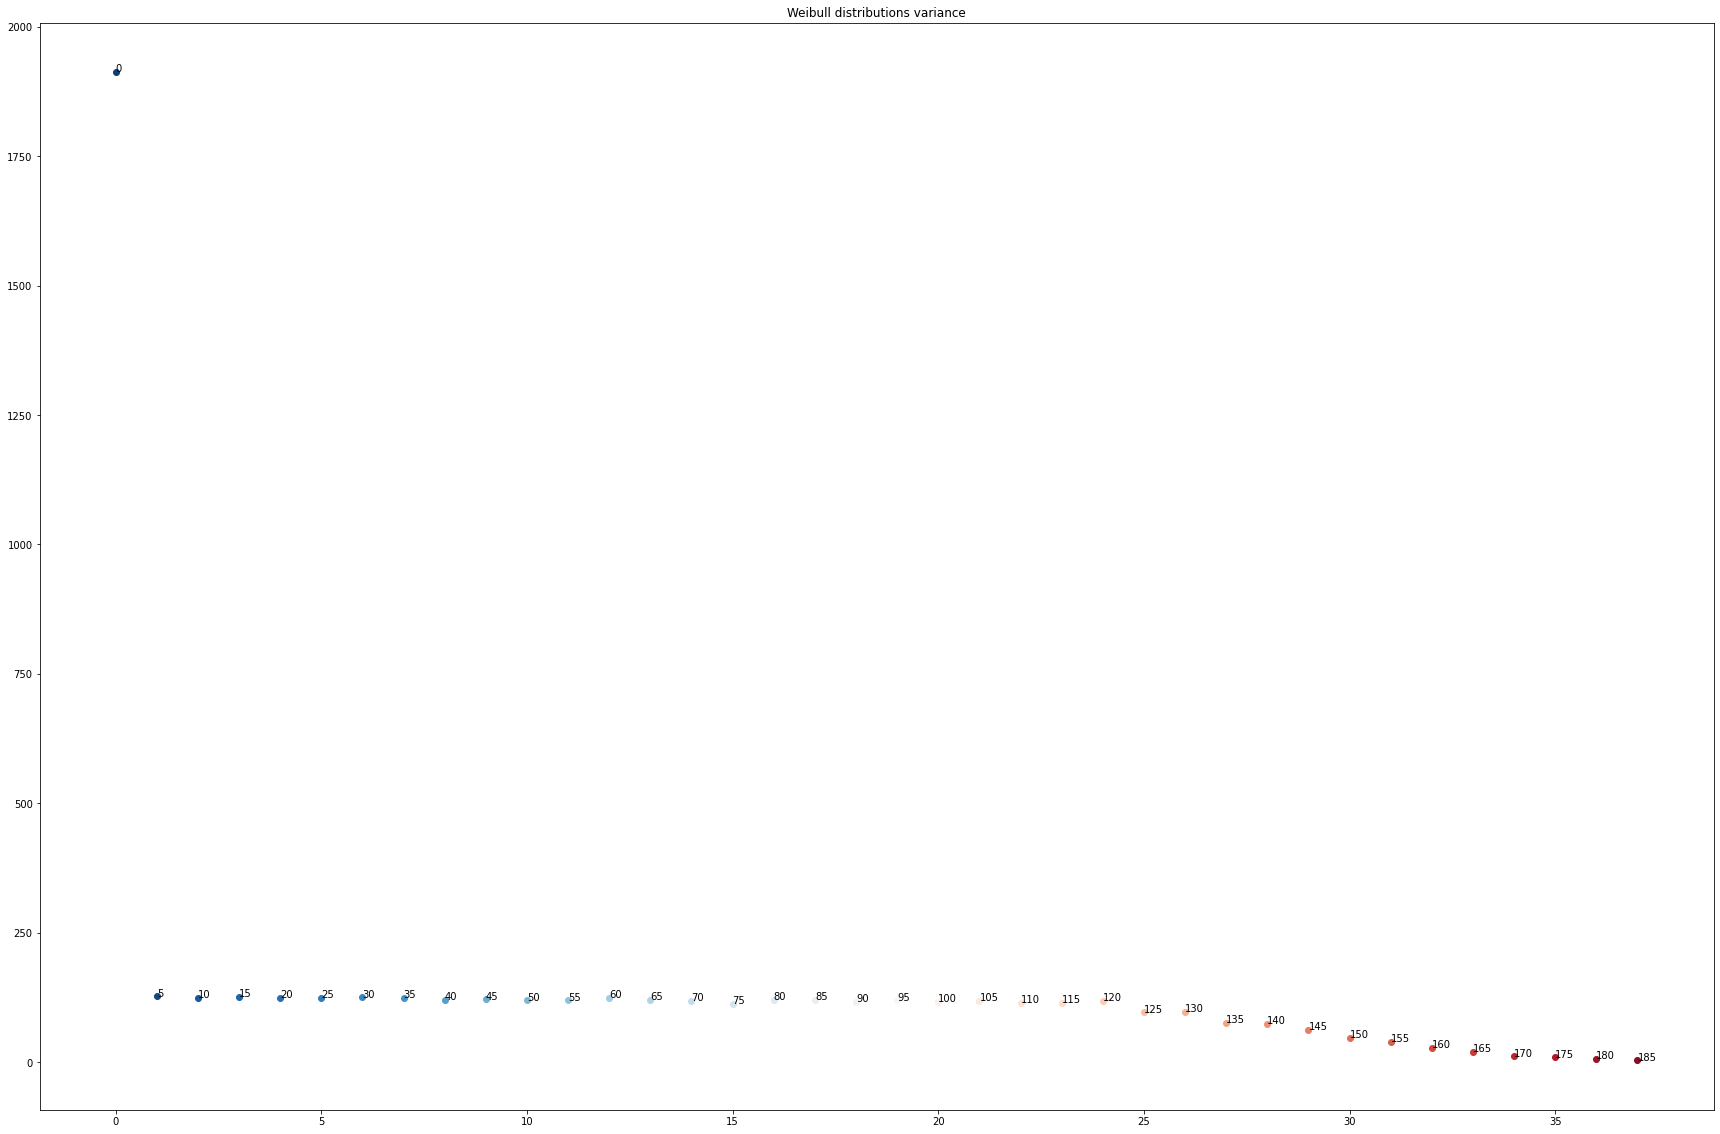

In [202]:
plot_weibull_variance(s)

In [115]:
a = np.array([[1,2,3,4],[5,6,7,8], [9,10,11,12]])

In [121]:
a

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12]])

In [125]:
np.mean(a[:,2:], axis=1)

array([ 3.5,  7.5, 11.5])

In [ ]:
net_cfg = {"num_rec": 2, "max_time": 25, "neuron_0": 74, "neuron_1": 71, "neuron_2": 78, "neuron_3": 68,
     "activation_0": "tanh", "activation_1": "sigmoid", "activation_2": "sigmoid", "activation_3": "tanh",
      "dropout_0": 0.04198965650706104, "dropout_1": 0.6518949855946009, "dropout_2": 0.5134433415117658,
       "dropout_3": 0.44181882048621723, "recurrent_dropout_0": 0.011379281378212352, "recurrent_dropout_1": 0.07877843876273939,
        "recurrent_dropout_2": 0.25685072170110057, "recurrent_dropout_3": 0.16640448683710898, "final_activation_0": "softplus",
         "final_activation_1": "softplus", "percentage": 63, "rul": 125, "rul_style": "nonlinear", "lr": 0.021745779733326226, "batch": "256"}

In [ ]:
id_col = 'unit_number'
time_col = 'time'
max_time = 32
mask_value = -99

feature_cols = ['op_setting_1', 'op_setting_2', 'op_setting_3'] + ['sensor_measurement_{}'.format(x) for x in
                                                                    range(1, 22)]
column_names = [id_col, time_col] + feature_cols
test_or = test_x_orig.copy()
test_or = np.concatenate([test_or[['unit_number', 'time']], scaler.transform(test_or[feature_cols])], axis=1)


# Preparing data for the RNN (numpy arrays)
test_or, _ = build_data(units=test_or[:, 0], time=test_or[:, 1], x=test_or[:, 2:], max_time=net_cfg['max_time'],
                                is_test=True, mask_value=-99,
                                original_data=np.repeat(200, test_or.shape[0]), net_cfg = net_cfg, label=net_cfg['rul_style'])


In [ ]:
reps = 30
test_predict_1_or = []
test_predict_2_or = []
for _ in range(reps):
    test_predict_or = model(test_or, training=True).numpy()
#     print(test_predict_or.shape)
#     break
    test_predict_1_or.append(test_predict_or[:,0].reshape(test_predict_or[:,0].shape[0], 1))
    test_predict_2_or.append(test_predict_or[:,1].reshape(test_predict_or[:,1].shape[0], 1))

test_predict_1_mean_or = np.average(np.hstack(test_predict_1_or), axis=1)
test_predict_2_mean_or = np.average(np.hstack(test_predict_2_or), axis=1)
test_predict_1_mean_or = test_predict_1_mean_or.reshape(test_predict_1_mean_or.shape[0],1)
test_predict_2_mean_or = test_predict_2_mean_or.reshape(test_predict_2_mean_or.shape[0],1)
test_predict_1_std_or = np.std(np.hstack(test_predict_1_or), axis=1)
test_predict_2_std_or = np.std(np.hstack(test_predict_2_or), axis=1)
test_predict_1_std_or = test_predict_1_std_or.reshape(test_predict_1_std_or.shape[0],1)
test_predict_2_std_or = test_predict_2_std_or.reshape(test_predict_2_std_or.shape[0],1)


test_predict_or = np.hstack([test_predict_1_mean_or, test_predict_2_mean_or, 
                           test_predict_1_std_or, test_predict_2_std_or])    

test_predict_or = np.resize(test_predict_or, (test_or.shape[0], 4))  # changed from 2 to 4
test_result_or = np.concatenate((test_y_orig, test_predict_or), axis=1)
test_results_df_or = pd.DataFrame(test_result_or, columns=['T',   'mean_alpha', 'mean_beta', 'std_alpha', 'std_beta']) # (add 'E' for event)
#     test_results_df['unit_number'] = train_x_orig.iloc[test_index]['unit_number'].to_numpy() # Note the train_x_orig
#     test_results_df['time'] = train_x_orig.iloc[test_index]['time'].to_numpy()

test_results_df_or['predicted_mu'] = test_results_df_or[['mean_alpha', 'mean_beta']].apply(lambda row: weibull_mean(row[0], row[1]), axis=1)
test_results_df_or['predicted_std+'] = test_results_df_or[['mean_alpha', 'mean_beta', 'std_alpha', 
                                                       'std_beta']].apply(lambda row: weibull_mean(row[0]+1.96*row[2]/np.sqrt(reps), 
                                                                                                   row[1]+1.96*row[3]/np.sqrt(reps)), axis=1)
test_results_df_or['predicted_std-'] = test_results_df_or[['mean_alpha', 'mean_beta', 'std_alpha', 
                                                           'std_beta']].apply(lambda row: weibull_mean(row[0]-1.96*row[2]/np.sqrt(reps),
                                                                                                       row[1]-1.96*row[3]/np.sqrt(reps)), axis=1)




# Old way
# test_predict_or = model(test_or, training=True).numpy()  # equivalent to model.predict(test_or) but with training=False
# test_predict_or = np.resize(test_predict_or, (test_or.shape[0], 2))
# test_result_or = np.concatenate((test_y_orig, test_predict_or), axis=1)
# test_results_df_or = pd.DataFrame(test_result_or, columns=['T', 'alpha', 'beta'])
# test_results_df_or['unit_number'] = np.arange(1, test_results_df_or.shape[0]+1)

# test_results_df_or['predicted_mu'] = test_results_df_or[['alpha', 'beta']].apply(lambda row: weibull_mean(row[0], row[1]), axis=1)

In [ ]:
test_results_df_or

In [ ]:
#1 - 10 epochs
np.sqrt(mean_squared_error(test_results_df_or['predicted_mu'], test_results_df_or['T']))

In [ ]:
#1 - 50 epochs
np.sqrt(mean_squared_error(test_results_df_or['predicted_mu'], test_results_df_or['T']))

In [ ]:
#2 - 21/50 epochs
np.sqrt(mean_squared_error(test_results_df_or['predicted_mu'], test_results_df_or['T']))

In [ ]:
for unit_number, grp in train_results_df.groupby('unit_number'):
    plot_weibull_predictions(grp, unit_number)
    break

In [ ]:
for unit_number, grp in test_results_df.groupby('unit_number'):
    plot_weibull_predictions(grp, unit_number)
    break

# Training full model on the best HP

In [203]:
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]="1,2,3,4,5"  # uncomment in case running ONLY on CPU is required

import tensorflow as tf
tf.random.set_seed(42)
from tensorflow.keras import backend as k
from tensorflow.keras import callbacks
from tensorflow.keras.callbacks import History
from tensorflow import keras
from tensorflow.keras.optimizers import Adam

from activations import Activate
from losses import CustomLoss
from preprocessing import build_data

import numpy as np
import pandas as pd
import math
from datetime import datetime

from sklearn import pipeline
from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler

In [217]:
net_cfg = {"num_rec": 2, "max_time": 22, "neuron_0": 78, "neuron_1": 71, "neuron_2": 87, "neuron_3": 96, "activation_0": "sigmoid", 
"activation_1": "tanh", "activation_2": "sigmoid", "activation_3": "sigmoid", "dropout_0": 0.18803475666664804, "dropout_1": 0.6040324537064773, 
"dropout_2": 0.3227885166987346, "dropout_3": 0.2287547425262742, "recurrent_dropout_0": 0.4464387484895227, "recurrent_dropout_1": 0.6236043939191586, 
"recurrent_dropout_2": 0.3135094606418331, "recurrent_dropout_3": 0.842983970188618, "final_activation_0": "softplus", "final_activation_1": "softplus", 
"percentage": 67, "rul": 127, "rul_style": "nonlinear", 
"lr": "1e-3", "batch": "128"}


In [218]:
cfg = {'cv': 10, 'shuffle': True,
'random_state': 21,
'mask_value': -99,
'reps': 30,
'epochs': 100,
'batches': 64}

In [ ]:
def weibull_mean(alpha, beta):
    return alpha * math.gamma(1 + 1/beta)

In [219]:
def network(train_X, train_y, net_cfg, cfg):
    k.set_epsilon(1e-10)
    history = History()
    nan_terminator = callbacks.TerminateOnNaN()
    reduce_lr = callbacks.ReduceLROnPlateau(monitor='loss')
    early_stopping = callbacks.EarlyStopping(monitor='loss', patience=5)
    checkpoint_filepath = './saved_models/cp-{epoch:04d}.ckpt'
    checkpoint = callbacks.ModelCheckpoint(filepath=checkpoint_filepath, monitor='loss', verbose=1)
    logdir="logs/test1" #+ datetime.now().strftime("%Y%m%d-%H%M%S")
    tensorboard = callbacks.TensorBoard(log_dir=logdir)

    window = train_X.shape[1]
    n_features = train_X.shape[2]

    inputs = keras.Input(shape=(window, n_features))
    masking_layer = keras.layers.Masking(mask_value=cfg['mask_value'])(inputs)

    # recurrent layers
    if net_cfg['num_rec'] > 1:
        for i in np.arange(net_cfg['num_rec']-1):
            masking_layer = keras.layers.GRU(net_cfg['neuron_'+str(i)], activation=net_cfg['activation_'+str(i)],
                                    dropout=net_cfg['dropout_'+str(i)],
                                    recurrent_dropout=net_cfg['recurrent_dropout_'+str(i)],
                                    return_sequences=True)(masking_layer)
    last = i + 1
    gru_last = keras.layers.GRU(net_cfg['neuron_'+str(last)], activation=net_cfg['activation_'+str(last)],
                                dropout=net_cfg['dropout_'+str(last)],
                                recurrent_dropout=net_cfg['recurrent_dropout_'+str(last)],
                                return_sequences=False)(masking_layer)

    dense_1 = keras.layers.Dense(2)(gru_last)
    custom_activation = Activate(net_cfg=net_cfg)
    outputs = keras.layers.Activation(custom_activation)(dense_1)

    model = keras.Model(inputs=inputs, outputs=outputs, name="weibull_params")

    # rmse = tf.keras.metrics.RootMeanSquaredError()
    model.compile(loss=CustomLoss(kind='continuous', reduce_loss=True), optimizer=Adam(lr=net_cfg['lr'],
                                                                                       clipvalue=0.5))
    model.summary()  # uncomment for debugging

    batch_size=eval(net_cfg['batch'])
    model.fit(train_X, train_y,
              epochs=cfg['epochs'],
              batch_size=eval(net_cfg['batch']),
              verbose=1,
              callbacks=[nan_terminator, history, reduce_lr, early_stopping, checkpoint],#, tensorboard],  # , tensorboard
              workers=32)

    return model, history



In [ ]:
# %load_ext tensorboard


In [ ]:
# %tensorboard --logdir=logdir --port 8889


In [220]:
def load_data():

    np.random.seed(42)

    id_col = 'unit_number'
    time_col = 'time'
    feature_cols = ['op_setting_1', 'op_setting_2', 'op_setting_3'] + ['sensor_measurement_{}'.format(x) for x in
                                                                       range(1, 22)]
    column_names = [id_col, time_col] + feature_cols

    train_x_orig = pd.read_csv('./DataSets/CMAPSS/train_FD001.csv', header=None, sep='\s+', decimal=".")
    train_x_orig.columns = column_names

    test_x_orig = pd.read_csv('./DataSets/CMAPSS/test_FD001.csv', header=None, sep='\s+', decimal=".")
    test_x_orig.columns = column_names

    test_y_orig = pd.read_csv('./DataSets/CMAPSS/RUL_FD001.csv', header=None, names=['T'])

    # Make engine numbers and days zero-indexed
    train_x_orig.iloc[:, 0:2] -= 1
    test_x_orig.iloc[:, 0:2] -= 1

    # Pre-processing data
    scaler = pipeline.Pipeline(steps=[
        ('minmax', MinMaxScaler(feature_range=(-1, 1))),
        ('remove_constant', VarianceThreshold())])

    train = train_x_orig.copy()
    train = np.concatenate([train[['unit_number', 'time']], scaler.fit_transform(train[feature_cols])], axis=1)

    train_x, train_y = build_data(units=train[:, 0], time=train[:, 1], x=train[:, 2:], max_time=net_cfg['max_time'],
                                    is_test=False, mask_value=cfg['mask_value'],
                                    original_data=None, net_cfg = net_cfg, label=net_cfg['rul_style'])

    test_or = test_x_orig.copy()
    test_or = np.concatenate([test_or[['unit_number', 'time']], scaler.transform(test_or[feature_cols])], axis=1)


    # Preparing data for the RNN (numpy arrays)
    test_or, _ = build_data(units=test_or[:, 0], time=test_or[:, 1], x=test_or[:, 2:], max_time=net_cfg['max_time'],
                                    is_test=True, mask_value=-99,
                                    original_data=np.repeat(200, test_or.shape[0]), net_cfg = net_cfg, label=net_cfg['rul_style'])

    

    return train_x, train_y, test_or, test_y_orig, train_x_orig


In [221]:
train_x, train_y, test_x, test_y, train_x_orig = load_data()


100%|██████████| 100/100 [00:00<00:00, 7198.54it/s]


In [222]:
print('train_x', train_x.shape, 'train_y', train_y.shape, 'test_x', test_x.shape, 'test_y', test_y.shape)


train_x (20631, 22, 17) train_y (20631, 1) test_x (100, 22, 17) test_y (100, 1)


In [ ]:
k.clear_session()
try:
    del model
except:
    pass

model, history = network(train_x, train_y, net_cfg, cfg)

In [208]:
model = tf.keras.models.load_model('./saved_models_3_12/cp-0100.ckpt/', custom_objects={"CustomLoss": CustomLoss, "Activate": Activate})

In [223]:
model.summary()

Model: "weibull_params"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 22, 17)]          0         
_________________________________________________________________
masking (Masking)            (None, 22, 17)            0         
_________________________________________________________________
gru (GRU)                    (None, 22, 78)            22698     
_________________________________________________________________
gru_1 (GRU)                  (None, 71)                32163     
_________________________________________________________________
dense (Dense)                (None, 2)                 144       
_________________________________________________________________
activation (Activation)      (None, 2)                 0         
Total params: 55,005
Trainable params: 55,005
Non-trainable params: 0
________________________________________________

In [ ]:
model.evaluate(train_x, train_y)

In [ ]:
model.evaluate(test_x, test_y)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
plt.plot(model.history.history['loss'],    label='training')
plt.title('loss')
plt.legend()

In [224]:
reps = 30
test_predict_1_or = []
test_predict_2_or = []
for _ in range(reps):
    test_predict_or = model(test_x, training=True).numpy()
#     print(test_predict_or.shape)
#     break
    test_predict_1_or.append(test_predict_or[:,0].reshape(test_predict_or[:,0].shape[0], 1))
    test_predict_2_or.append(test_predict_or[:,1].reshape(test_predict_or[:,1].shape[0], 1))

test_predict_1_mean_or = np.median(np.hstack(test_predict_1_or), axis=1)
test_predict_2_mean_or = np.median(np.hstack(test_predict_2_or), axis=1)
test_predict_1_mean_or = test_predict_1_mean_or.reshape(test_predict_1_mean_or.shape[0],1)
test_predict_2_mean_or = test_predict_2_mean_or.reshape(test_predict_2_mean_or.shape[0],1)
test_predict_1_std_or = np.std(np.hstack(test_predict_1_or), axis=1)
test_predict_2_std_or = np.std(np.hstack(test_predict_2_or), axis=1)
test_predict_1_std_or = test_predict_1_std_or.reshape(test_predict_1_std_or.shape[0],1)
test_predict_2_std_or = test_predict_2_std_or.reshape(test_predict_2_std_or.shape[0],1)


test_predict_or = np.hstack([test_predict_1_mean_or, test_predict_2_mean_or, 
                           test_predict_1_std_or, test_predict_2_std_or])    

test_predict_or = np.resize(test_predict_or, (test_x.shape[0], 4))  # changed from 2 to 4
test_result_or = np.concatenate((test_y, test_predict_or), axis=1)
test_results_df_or = pd.DataFrame(test_result_or, columns=['T',   'mean_alpha', 'mean_beta', 'std_alpha', 'std_beta']) # (add 'E' for event)
#     test_results_df['unit_number'] = train_x_orig.iloc[test_index]['unit_number'].to_numpy() # Note the train_x_orig
#     test_results_df['time'] = train_x_orig.iloc[test_index]['time'].to_numpy()

test_results_df_or['predicted_mu'] = test_results_df_or[['mean_alpha', 'mean_beta']].apply(lambda row: weibull_mean(row[0], row[1]), axis=1)
# test_results_df_or['predicted_std+'] = test_results_df_or[['mean_alpha', 'mean_beta', 'std_alpha', 
#                                                        'std_beta']].apply(lambda row: weibull_mean(row[0]+1.96*row[2]/np.sqrt(reps), 
#                                                                                                    row[1]+1.96*row[3]/np.sqrt(reps)), axis=1)
# test_results_df_or['predicted_std-'] = test_results_df_or[['mean_alpha', 'mean_beta', 'std_alpha', 
#                                                            'std_beta']].apply(lambda row: weibull_mean(row[0]-1.96*row[2]/np.sqrt(reps),
#                                                                                                        row[1]-1.96*row[3]/np.sqrt(reps)), axis=1)




# Old way
# test_predict_or = model(test_or, training=True).numpy()  # equivalent to model.predict(test_or) but with training=False
# test_predict_or = np.resize(test_predict_or, (test_or.shape[0], 2))
# test_result_or = np.concatenate((test_y_orig, test_predict_or), axis=1)
# test_results_df_or = pd.DataFrame(test_result_or, columns=['T', 'alpha', 'beta'])
# test_results_df_or['unit_number'] = np.arange(1, test_results_df_or.shape[0]+1)

# test_results_df_or['predicted_mu'] = test_results_df_or[['alpha', 'beta']].apply(lambda row: weibull_mean(row[0], row[1]), axis=1)

In [225]:
test_results_df_or

,T,mean_alpha,mean_beta,std_alpha,std_beta,predicted_mu
0,112.0,127.000496,139.777527,0.175419,17.800121,126.482431
1,98.0,127.000580,139.676544,0.187293,20.484858,126.482144
2,69.0,114.325890,8.575016,18.087215,4.658646,108.022032
3,82.0,126.920700,114.726791,5.694047,56.967266,126.291596
4,91.0,125.552719,23.376440,12.753175,61.303551,122.671266
...,...,...,...,...,...,...
95,137.0,127.000122,139.778549,0.705115,24.290260,126.482062
96,82.0,126.908508,75.807785,6.880072,50.361259,125.963782
97,59.0,121.887703,13.260256,14.639907,34.812073,117.223730
98,117.0,127.000519,139.781921,0.022679,0.910391,126.482470


In [226]:
train_predict_1 = []
train_predict_2 = []

success = True

for i in range(cfg['reps']):
    tf.random.set_seed(i)
    train_predict = model(train_x, training=True).numpy()
    train_predict_1.append(train_predict[:, 0].reshape(train_predict[:, 0].shape[0], 1))
    train_predict_2.append(train_predict[:, 1].reshape(train_predict[:, 1].shape[0], 1))

train_predict_1_mean = np.mean(np.hstack(train_predict_1), axis=1)
train_predict_2_mean = np.mean(np.hstack(train_predict_2), axis=1)
train_predict_1_mean = train_predict_1_mean.reshape(train_predict_1_mean.shape[0], 1)
train_predict_2_mean = train_predict_2_mean.reshape(train_predict_2_mean.shape[0], 1)
train_predict_1_std = np.std(np.hstack(train_predict_1), axis=1)
train_predict_2_std = np.std(np.hstack(train_predict_2), axis=1)
train_predict_1_std = train_predict_1_std.reshape(train_predict_1_std.shape[0], 1)
train_predict_2_std = train_predict_2_std.reshape(train_predict_2_std.shape[0], 1)

train_predict = np.hstack([train_predict_1_mean, train_predict_2_mean,
                            train_predict_1_std, train_predict_2_std])

train_predict = np.resize(train_predict, (train_x.shape[0], 4))  # changed from 2 to 4
train_result = np.concatenate((train_y, train_predict), axis=1)
train_results_df = pd.DataFrame(train_result, columns=['T', 'mean_alpha', 'mean_beta', 'std_alpha',
                                                        'std_beta'])  # (add 'E' for event)
train_results_df['unit_number'] = train_x_orig['unit_number'].to_numpy()
train_results_df['time'] = train_x_orig['time'].to_numpy()

train_results_df['predicted_mu'] = train_results_df[['mean_alpha', 'mean_beta']].apply(
    lambda row: weibull_mean(row[0], row[1]), axis=1)
# train_results_df['predicted_std+'] = train_results_df[['mean_alpha', 'mean_beta', 'std_alpha',
#                                                         'std_beta']].apply(
#     lambda row: weibull_mean(row[0] + 1.96 * row[2] / np.sqrt(cfg['reps']),
#                                 row[1] + 1.96 * row[3] / np.sqrt(cfg['reps'])), axis=1)
# train_results_df['predicted_std-'] = train_results_df[['mean_alpha', 'mean_beta', 'std_alpha',
#                                                         'std_beta']].apply(
#     lambda row: weibull_mean(row[0] - 1.96 * row[2] / np.sqrt(cfg['reps']),
#                                 row[1] - 1.96 * row[3] / np.sqrt(cfg['reps'])), axis=1)

In [227]:
train_results_df

,T,mean_alpha,mean_beta,std_alpha,std_beta,unit_number,time,predicted_mu
0,127.000000,95.165878,2.823542,3.282336,0.853987,0,0,84.767768
1,127.000000,126.865738,133.436966,1.001118,3.733579,0,1,126.323947
2,127.000000,126.886314,138.390182,0.254850,1.542951,0,2,126.363590
3,127.000000,126.921738,139.317123,0.131177,0.812679,0,3,126.402304
4,127.000000,126.914185,139.033203,0.124674,1.277238,0,4,126.393734
...,...,...,...,...,...,...,...,...
20626,9.621212,12.479185,2.703338,7.278916,1.495592,99,195,11.097997
20627,7.696970,14.656072,3.003326,7.381813,1.466886,99,196,13.088211
20628,5.772727,13.578466,2.882572,9.032871,1.195122,99,197,12.104789
20629,3.848485,12.180607,2.793478,7.626794,1.277995,99,198,10.845276


In [228]:
np.sqrt(mean_squared_error(train_results_df['predicted_mu'], train_results_df['T']))

8.927994332301353

In [229]:
r2_score(train_results_df['predicted_mu'], train_results_df['T'])

0.9250968510791565

In [230]:
np.sqrt(mean_squared_error(test_results_df_or['predicted_mu'], test_results_df_or['T']))

33.74795638871993

In [231]:
r2_score(test_results_df_or['predicted_mu'], test_results_df_or['T'])

0.07469041440966029